In [135]:
import pandas as pd 
import numpy as np 
import scipy.io
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.svm import SVC


# Question 1

In [6]:
mat_dataA = scipy.io.loadmat(r'C:\Users\tonkh\OneDrive\Desktop\ECE 657A\Assignment\Assignment2\Assignment2\Datasets\DataA.mat')
#dataB = pd.read_csv(r'C:\Users\tonkh\OneDrive\Desktop\ECE 657A\Assignment\Assignment2\Assignment2\Datasets\DataA.mat')

In [7]:
mat_dataA

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Oct 21 15:46:48 2014',
 '__version__': '1.0',
 '__globals__': [],
 'fea': array([[1, 2, 1, ..., 2, 2, 1],
        [3, 3, 4, ..., 1, 3, 4],
        [4, 1, 4, ..., 2, 4, 4],
        ...,
        [3, 4, 4, ..., 3, 1, 2],
        [1, 4, 3, ..., 4, 3, 4],
        [4, 3, 1, ..., 2, 4, 3]], dtype=uint8),
 'gnd': array([[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]], dtype=int16)}

In [16]:
df_dataA=pd.DataFrame.from_dict(mat_dataA,orient='index')

In [18]:
df_dataA

,0
__header__,"b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Crea..."
__version__,1.0
__globals__,[]
fea,"[[1, 2, 1, 2, 1, 2, 3, 3, 3, 3, 1, 2, 1, 3, 4,..."
gnd,"[[1], [1], [1], [-1], [-1], [-1], [1], [1], [1..."


In [17]:
mat_dataA

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Oct 21 15:46:48 2014',
 '__version__': '1.0',
 '__globals__': [],
 'fea': array([[1, 2, 1, ..., 2, 2, 1],
        [3, 3, 4, ..., 1, 3, 4],
        [4, 1, 4, ..., 2, 4, 4],
        ...,
        [3, 4, 4, ..., 3, 1, 2],
        [1, 4, 3, ..., 4, 3, 4],
        [4, 3, 1, ..., 2, 4, 3]], dtype=uint8),
 'gnd': array([[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]], dtype=int16)}

In [22]:
mat_features_datA=mat_dataA['fea']

In [24]:
mat_label_dataA=mat_dataA['gnd']

In [45]:
df_features_dataA=pd.DataFrame(mat_features_datA)
df_features_dataA

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,1,2,1,2,1,2,3,3,3,3,...,4,3,2,3,4,2,2,2,2,1
1,3,3,4,2,1,2,2,4,3,2,...,3,1,4,3,4,4,4,1,3,4
2,4,1,4,4,4,4,1,1,2,1,...,1,1,2,1,1,4,2,2,4,4
3,1,4,1,1,3,3,4,4,3,4,...,2,1,3,3,4,1,3,3,4,2
4,3,4,4,3,1,1,4,4,4,1,...,4,3,1,3,2,1,4,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,3,3,3,4,2,2,3,3,4,4,...,2,1,4,3,3,4,1,2,1,3
2196,3,3,1,1,2,3,3,4,3,1,...,4,2,1,3,1,2,3,4,2,3
2197,3,4,4,3,3,3,1,2,4,3,...,2,4,3,3,4,1,2,3,1,2
2198,1,4,3,4,1,3,4,2,4,3,...,4,2,4,2,2,2,4,4,3,4


In [47]:
print(df_features_dataA.describe())

                0            1            2            3            4   \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean      2.493182     2.529545     2.506818     2.526818     2.547727   
std       1.103943     1.086542     1.098160     1.118780     1.081699   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%       2.000000     2.000000     2.000000     2.000000     2.000000   
50%       3.000000     3.000000     3.000000     3.000000     3.000000   
75%       3.000000     3.000000     3.000000     4.000000     3.000000   
max       4.000000     4.000000     4.000000     4.000000     4.000000   

                5            6            7            8           9   ...  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.00000  ...   
mean      2.492727     2.550000     2.541364     2.553182     2.56500  ...   
std       1.099399     1.109818     1.103600     1.126751     1.10822  ...   
min       1.000000   

In [49]:
#Check missing values
df_features_dataA.isna().sum().sum()

0

### There are no missing values in the dataset

In [41]:
df_label_dataA=pd.DataFrame(mat_label_dataA)
df_label_dataA[0].unique()

array([ 1, -1], dtype=int16)

### There are two unique labels in the data set -1 and 1

In [51]:
#checking missing labels
df_label_dataA[0].isna().sum().sum()

0

### There are no missing labels in the data set

### Part 1 - Z-Score Normalization

In [56]:
 # Z-Score Normalization
ss = StandardScaler()
ss.fit(df_features_dataA)
z_standardized_dataA = ss.transform(df_features_dataA)

In [83]:
print(z_standardized_dataA)

[[-1.35289759 -0.48747864 -1.37244139 ... -0.4584159  -0.41756618
  -1.39224875]
 [ 0.45920268  0.43308188  1.36002111 ... -1.37441497  0.49741947
   1.36965138]
 [ 1.36525282 -1.40803915  1.36002111 ... -0.4584159   1.41240513
   1.36965138]
 ...
 [ 0.45920268  1.35364239  1.36002111 ...  0.45758317 -1.33255183
  -0.47161537]
 [-1.35289759  1.35364239  0.44920027 ...  1.37358225  0.49741947
   1.36965138]
 [ 1.36525282  0.43308188 -1.37244139 ... -0.4584159   1.41240513
   0.44901801]]


In [90]:
#convert labels to numpy array
np_label_dataA=df_label_dataA.to_numpy()
print("converted array is :",np_label_dataA)

converted array is : [[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]


### Randomnly spliting the data 70% of samples for taining and other 30% for testing
### using hold-out scheme

In [93]:
x_train_dataA, x_test_dataA, y_train_dataA, y_test_dataA = train_test_split(z_standardized_dataA,np_label_dataA.ravel(),train_size=0.7, test_size =
0.3, random_state = 40)
#model.fit(x_train_dataA, y_train_dataA)
#y_predict_dataA = model.predict(x_test_dataA)
print(x_train_dataA)
print(y_train_dataA)

[[-0.44684745  1.35364239 -0.46162056 ... -0.4584159  -0.41756618
   0.44901801]
 [ 0.45920268 -1.40803915  1.36002111 ...  0.45758317  0.49741947
   1.36965138]
 [-1.35289759  1.35364239 -1.37244139 ...  0.45758317  1.41240513
  -0.47161537]
 ...
 [ 1.36525282 -0.48747864 -0.46162056 ... -0.4584159   0.49741947
   0.44901801]
 [ 0.45920268  1.35364239  0.44920027 ...  1.37358225  1.41240513
  -0.47161537]
 [ 0.45920268  0.43308188  0.44920027 ...  0.45758317 -1.33255183
  -0.47161537]]
[ 1 -1 -1 ...  1 -1  1]


### The holdout method is the simplest kind of cross validation. The data set is separated into two sets, called the training set and the testing set. The function approximator fits a function using the training set only. Then the function approximator is asked to predict the output values for the data in the testing set (it has never seen these output values before). The errors it makes are accumulated as before to give the mean absolute test set error, which is used to evaluate the model. The advantage of this method is that it is usually preferable to the residual method and takes no longer to compute. However, its evaluation can have a high variance. The evaluation may depend heavily on which data points end up in the training set and which end up in the test set, and thus the evaluation may be significantly different depending on how the division is made. --> need to reword it

### 2. 5-fold cross validation on training set to select the parameters k for k_NN from given set and plot

In [74]:
k_list=list(range(1,32,2))
print("Set of parameters for k value is:",k_list)

Set of parameters for k value is: [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]


In [102]:
# empty list to store accuracy
K_accuracy=[]

# looping through given values of k
for k in k_list:
    # 2. KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. cross_val_score for KNeighborsClassifier with k neighbours
    accuracy = cross_val_score(knn, x_train_dataA, y_train_dataA, cv=5, scoring='accuracy')
    #4. append mean of scores for k neighbours to k_accuracy list
    K_accuracy.append(accuracy.mean())

print(K_accuracy)


[0.7123376623376624, 0.7298701298701299, 0.7279220779220779, 0.72987012987013, 0.7220779220779221, 0.7272727272727273, 0.718181818181818, 0.7201298701298702, 0.7188311688311688, 0.7207792207792207, 0.7116883116883117, 0.7097402597402598, 0.7123376623376624, 0.7071428571428571, 0.7084415584415584, 0.7064935064935065]


Text(0, 0.5, 'Cross-validated accuracy')

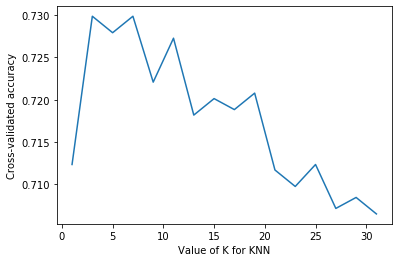

In [96]:
plt.plot(k_list, K_accuracy)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')

In [98]:
print('The best Calculation accuracy is :' , max(K_accuracy))


The best Calculation accuracy is : 0.72987012987013


### The Best Calculation accuracy of 0.72987012987013 ie. 72.987012987013 % is best for value of K=3

### 3. RBF Kernel best parameter selection in terms of classification accuracy

In [103]:
# Dictionary od possible parameters
c=[0.1, 0.5, 1, 2, 5, 10, 20, 50]
gamma=[0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10]
param_dict=dict(gamma=gamma,c=c)
print(param_dict)

{'gamma': [0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10], 'c': [0.1, 0.5, 1, 2, 5, 10, 20, 50]}


In [119]:
#Grid Search CV Object
grid_rbf=GridSearchCV(SVC(), param_dict,cv=None)

#z_standardized_dataA
# c= None takes default 5-fold crossvalidation as given in documentation
#print(grid_rbf)

In [139]:
# Data fitted with best parameters 
#clf=svm.SVC()
#clf.fit(x_train_dataA, y_train_dataA)
grid_rbf.fit(x_train_dataA, y_train_dataA)
#grid_rbf.fit(z_standardized_dataA,np_label_dataA.ravel())
#grid_rbf.get_params().keys()
#print("The best classifier is: ", clf.cv_results_)


ValueError: Invalid parameter c for estimator SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False). Check the list of available parameters with `estimator.get_params().keys()`.